#CVPR Assignment - 1
# Download Images from Kaggle-->>

In [4]:
import kagglehub
dataset = kagglehub.dataset_download('vishweshsalodkar/wild-animals')

print('Images download done.')

Images download done.


# Import libraries
```



In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

# Images Category

In [6]:
print(os.listdir(dataset))

['Animals']


In [7]:
dataset = os.path.join(dataset, "Animals")
print(os.listdir(dataset))

['Jaguar', 'Tiger', 'Cheetah', 'Leopard', 'Lion']


In [8]:
categories = os.listdir(dataset)
print(categories)

['Jaguar', 'Tiger', 'Cheetah', 'Leopard', 'Lion']


In [9]:
print ([os.listdir(os.path.join(dataset, category)) for category in categories])

[['jaguar-1727406__340.jpg', 'photo-1469367498026-54a83d222f12.jpg', 'pexels-photo-7124473.jpeg', 'jaguar-halbwuchsig-sepia-profile-41002.jpeg', 'pexels-photo-155164.jpeg', 'photo-1552845301-7ff61cbb2865.jpg', 'photo-1528238344097-a8994f7c74e4.jpg', 'pexels-photo-8562894.jpeg', 'photo-1604994956847-2b0ab169366b.jpg', 'jaguar-1337201__340.jpg', 'africa-animals-zoo-tiger.jpg', 'pexels-photo-4468189 (1).jpeg', 'photo-1577053711673-cdf8e87a38e5.jpg', 'jaguar-859412__340.jpg', 'photo-1601544359642-c76c4f7c3221.jpg', 'photo-1584313452299-86bbb3f16eca.jpg', 'pexels-photo-5899760.jpeg', 'pexels-photo-4468189.jpeg', 'photo-1477949775154-d739b82400b3 (1).jpg', 'photo-1477949775154-d739b82400b3.jpg', 'photo-1534759846116-5799c33ce22a.jpg', 'photo-1614371611363-bbce32167c6c.jpg', 'animal-2607__340.jpg', 'photo-1584307228520-94ee423187ed.jpg', 'photo-1584313453147-be9beeb8504f.jpg', 'pexels-photo-773004.jpeg', 'animal-world-3193850__340.jpg', 'photo-1486173789830-3a5236a03ab1.jpg', 'jaguar-2188660_

# Train Images

In [38]:
train_data = []

for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)
    for img in tqdm(os.listdir(path)):
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.resize(img_gray, (100, 100))
        train_data.append([img_gray, label])

100%|██████████| 32/32 [00:00<00:00, 285.76it/s]


In [11]:
np.random.shuffle(train_data)
print ([train_data[i][1] for i in range(10)])

[1, 2, 0, 1, 3, 3, 4, 2, 4, 2]


# Show the Images

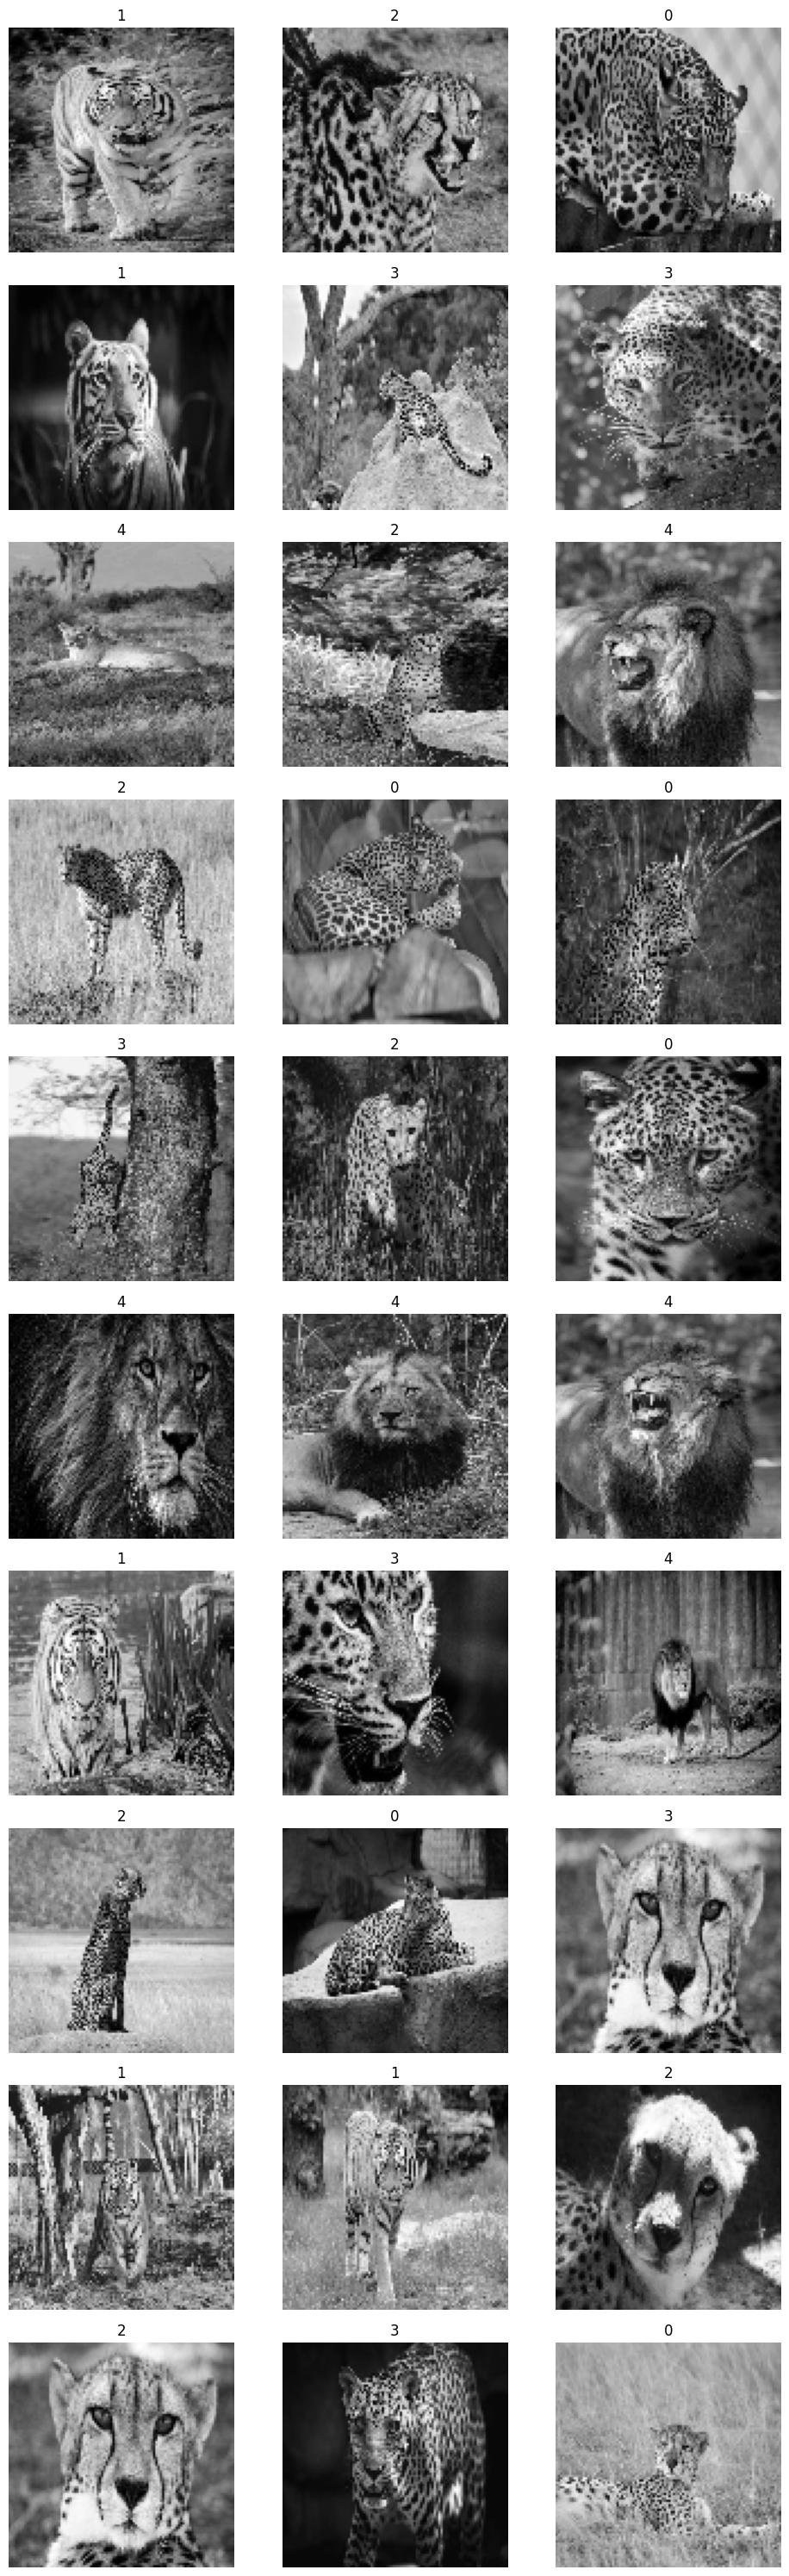

In [13]:
fig, axes = plt.subplots(10, 3, figsize=(10, 30))

for i, ax in enumerate(axes.flat):
    img_array, label = train_data[i]
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()


Separate Images

In [14]:
folds = []
for i in range(5):
    folds.append(train_data[i::5])

len(folds)


5

In [34]:
for fold_index in range(len(folds)):
    fold = folds[fold_index]
    labels = [label for _, label in fold]
    print(f"Fold {fold_index + 1}:")
    print(f"Labels: {labels}")


Fold 1:
Labels: [1, 3, 0, 4, 4, 1, 1, 4, 1, 2, 0, 4, 3, 4, 2, 2, 2, 2, 2, 4, 2, 1, 1, 2, 4, 1, 0, 2, 0, 2, 0, 3, 4, 4]
Fold 2:
Labels: [2, 4, 0, 4, 2, 2, 1, 3, 3, 0, 3, 0, 1, 4, 3, 0, 2, 4, 2, 1, 0, 4, 2, 1, 0, 1, 2, 2, 4, 0, 3, 2, 2, 1]
Fold 3:
Labels: [0, 2, 3, 4, 0, 2, 0, 0, 0, 2, 2, 4, 4, 1, 0, 3, 1, 3, 3, 4, 1, 0, 3, 2, 4, 3, 3, 4, 4, 3, 2, 2, 2, 2]
Fold 4:
Labels: [1, 4, 2, 1, 3, 3, 1, 4, 4, 3, 1, 2, 1, 4, 4, 0, 3, 0, 0, 2, 1, 3, 3, 1, 2, 3, 0, 2, 0, 4, 0, 4, 1, 1]
Fold 5:
Labels: [3, 2, 0, 3, 1, 0, 1, 3, 4, 1, 1, 2, 0, 3, 0, 1, 3, 1, 1, 2, 1, 3, 3, 1, 1, 3, 0, 4, 1, 1, 1, 4, 2, 1]


In [16]:
def l2_distance(valid_img, train_img):
    difference = valid_img - train_img
    squared_difference = np.square(difference)
    summed_squares = np.sum(squared_difference)
    distance = np.sqrt(summed_squares)
    return distance


In [17]:
from collections import Counter

def knn_prediction(l2_distances, k=1):
    nearest_neighbors = l2_distances[:k]

    labels = [label for _, label in nearest_neighbors]

    label_counts = Counter(labels)
    most_common_label = label_counts.most_common(1)[0][0]

    return most_common_label


Accuracy calculate

> Add blockquote



In [36]:
fold_accuracies = []
avg_accuracies = []

for k in range(1, 31):
    accuracies = []

    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []

        for valid_img in valid_set:
            l2_distances = [
                (l2_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l2_distances.sort()

            predicted_label = knn_prediction(l2_distances, k)
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    fold_accuracies.append(accuracies)
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies.append(avg_accuracy)

    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")




K = 1:
  Average Accuracy: 0.29

K = 2:
  Average Accuracy: 0.29

K = 3:
  Average Accuracy: 0.29

K = 4:
  Average Accuracy: 0.29

K = 5:
  Average Accuracy: 0.29

K = 6:
  Average Accuracy: 0.29

K = 7:
  Average Accuracy: 0.31

K = 8:
  Average Accuracy: 0.30

K = 9:
  Average Accuracy: 0.29

K = 10:
  Average Accuracy: 0.27

K = 11:
  Average Accuracy: 0.25

K = 12:
  Average Accuracy: 0.24

K = 13:
  Average Accuracy: 0.24

K = 14:
  Average Accuracy: 0.24

K = 15:
  Average Accuracy: 0.24

K = 16:
  Average Accuracy: 0.25

K = 17:
  Average Accuracy: 0.26

K = 18:
  Average Accuracy: 0.25

K = 19:
  Average Accuracy: 0.25

K = 20:
  Average Accuracy: 0.28

K = 21:
  Average Accuracy: 0.26

K = 22:
  Average Accuracy: 0.25

K = 23:
  Average Accuracy: 0.25

K = 24:
  Average Accuracy: 0.23

K = 25:
  Average Accuracy: 0.24

K = 26:
  Average Accuracy: 0.23

K = 27:
  Average Accuracy: 0.25

K = 28:
  Average Accuracy: 0.24

K = 29:
  Average Accuracy: 0.25

K = 30:
  Average Accu

# Show the graph

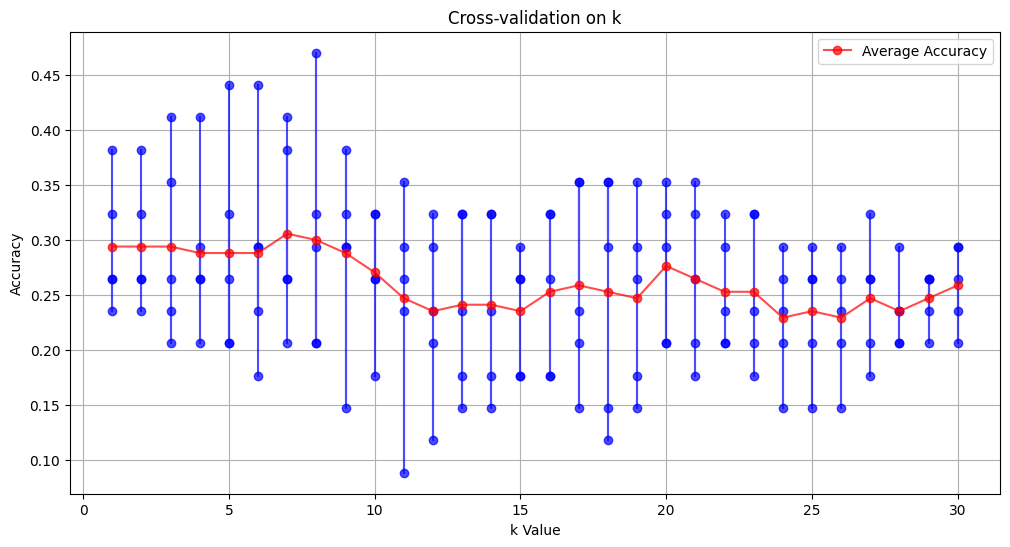

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

for k in range(30):
    fold_accuracy = fold_accuracies[k]

    plt.plot([k + 1] * len(fold_accuracy), fold_accuracy, linestyle='-', marker='o', alpha=0.7, color='blue')

plt.plot(range(1, 31), avg_accuracies, color='red', alpha=0.7, label='Average Accuracy', linestyle='-', marker='o')

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k')

plt.grid(True)
plt.legend()

plt.show()

